# Imports


In [491]:
import os
import re
import math
import random
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt



# Naive Bayes Class

In [492]:
class NaiveBayes:
    def __init__(self, total_data, laplace_smoothing):
        self.laplace_smoothing = laplace_smoothing
        self.total_data = total_data
        self.memo = defaultdict(int)
        self.vocabulary = defaultdict(set)
        self.label_frequency = defaultdict(int) 

    def calculate_probability(self, frequency, num_events, voc_size):
        probability = (frequency + self.laplace_smoothing)/(num_events + self.laplace_smoothing*voc_size)
        probability = math.log(probability)
        return probability


    def train(self, feature_matrix, classes):
        
        for features, label in zip(feature_matrix, classes):
            self.label_frequency[label] += 1
        
            for feature_idx, feature_value in enumerate(features):
                memo_key = (feature_idx, feature_value, label)
                self.vocabulary[feature_idx].add(feature_value)
                self.memo[memo_key] += 1


    def test(self, feature_matrix):
        predictions = []
        num_unique_classes = len(self.label_frequency)

        for features in feature_matrix:
            probabilities = []
        
            for label, frequency in self.label_frequency.items():
                class_probability = self.calculate_probability(frequency, self.total_data, num_unique_classes)

                probability = class_probability
                for feature_idx, feature_value in enumerate(features):
                    # p(feature/label)
                    feature = (feature_idx, feature_value, label)
                    feature_probability = self.calculate_probability(self.memo[feature], frequency, len(self.vocabulary[feature_idx]))
                    probability += feature_probability

                probabilities.append((label, probability))

            predictions.append(max(probabilities, key= lambda x: x[1] )[0])

        return predictions

# Train Naive Bayes


In [493]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1

    return (correct / len(y_true))*100

train = []
filename = './train.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            train.append(line.split(','))
            


X_train = [x[:-1] for x in train]
y_train = [x[-1] for x in train]


# Test for Naive Bayes

In [494]:

test = []
filename = './test.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            test.append(line.split(','))

X_test = [x[:-1] for x in test]
y_test = [x[-1] for x in test]


naive_bayes = NaiveBayes(laplace_smoothing=0.1, total_data=len(y_train))
naive_bayes.train(X_train, y_train)

naive_bayes_predictions = naive_bayes.test(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Naive Bayes Accuracy:", naive_bayes_accuracy, '%')



Naive Bayes Accuracy: 65.32258064516128 %


# Plot the graph of Laplace Values Vs Naive Bayes

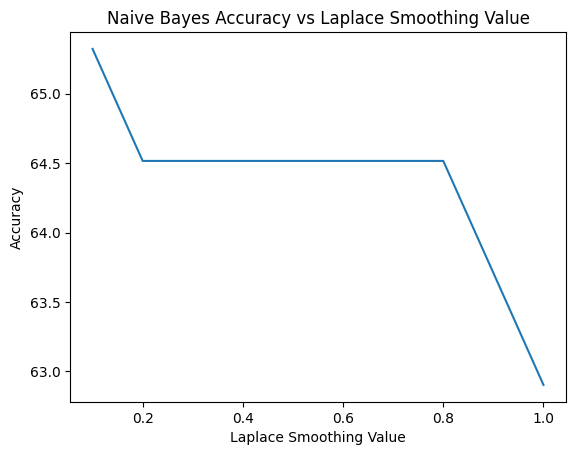

In [495]:
nb_accuracies_laplace = []

for i in range(1, 11):
    naive_bayes = NaiveBayes(laplace_smoothing=i*0.1, total_data=len(y_train))
    naive_bayes.train(X_train, y_train)

    naive_bayes_predictions = naive_bayes.test(X_test)
    naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
    nb_accuracies_laplace.append(naive_bayes_accuracy)

#now for the best laplace smoothing value we draw the graph
plt.plot([0.1*i for i in range(1, 11)], nb_accuracies_laplace)
plt.xlabel('Laplace Smoothing Value')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy vs Laplace Smoothing Value')
plt.show()



# Logistic Regression

# Logistic Regression Class

In [496]:


class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.classes = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.classes = np.unique(y)
        self.weights = np.zeros((num_features, len(self.classes)))
        self.bias = np.zeros(len(self.classes))

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - self.one_hot_encode(y)))
            db = (1 / num_samples) * np.sum(y_pred - self.one_hot_encode(y), axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        return self.classes[np.argmax(y_pred, axis=1)]

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def one_hot_encode(self, y):
        encoded = np.zeros((len(y), len(self.classes)))
        for i, label in enumerate(y):
            encoded[i, np.where(self.classes == label)] = 1
        return encoded


# Train Logistic Regression

In [497]:
# Perform label encoding
def label_encode(data, label_mapping=None):
    if label_mapping is None:
        label_mapping = {}
    encoded_data = []

    for label in data:

        if label not in label_mapping:
            label_mapping[label] = len(label_mapping)
        encoded_data.append(label_mapping[label])
    return np.array(encoded_data), label_mapping

train = []
filename = './train.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            train.append(line.split(','))
            


X_train = [x[:-1] for x in train]
y_train = [x[-1] for x in train]

X_train = np.array(X_train)
y_train = np.array(y_train)

# Test Logistic Regression

In [498]:
test = []
filename = './test.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            test.append(line.split(','))

X_test = [x[:-1] for x in test]
y_test = [x[-1] for x in test]


X_test = np.array(X_test)
y_test = np.array(y_test)

X_train_encoded, label_mapping = label_encode(X_train.flatten())
X_train_encoded = X_train_encoded.reshape(X_train.shape)

train_mappings = []
for label in X_test.flatten():
    if label in label_mapping:
        train_mappings.append(label_mapping[label])
    else:
        train_mappings.append(len(label_mapping))
X_test_encoded = np.array(train_mappings)
X_test_encoded = X_test_encoded.reshape(X_test.shape)

lr_model = LogisticRegression(learning_rate=0.1, num_iterations=10000)
lr_model.fit(X_train_encoded, y_train)

lr_pred = lr_model.predict(X_test_encoded)
lr_accuracy = np.mean(lr_pred == y_test)
print("Logistic Regression Accuracy:", lr_accuracy*100, '%')

Logistic Regression Accuracy: 50.806451612903224 %


# Graph of Logistic Regression Vs Learning Rates

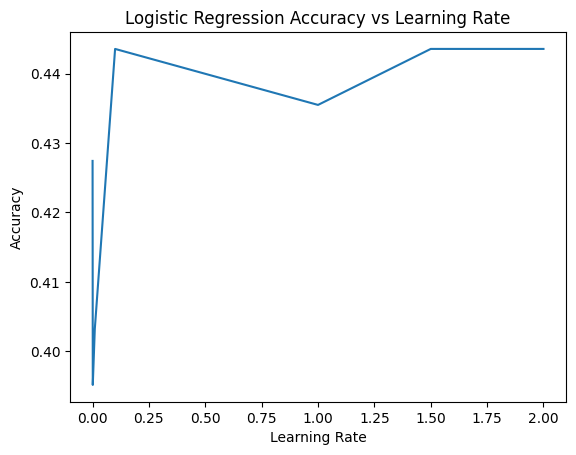

In [500]:
#now for some learning rate and iterations we draw the graph
lr_accuracies = []
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5, 2.0]
for learning_rate in learning_rates:
    lr_model = LogisticRegression(learning_rate=learning_rate, num_iterations=1000)
    lr_model.fit(X_train_encoded, y_train)

    lr_pred = lr_model.predict(X_test_encoded)
    lr_accuracy = np.mean(lr_pred == y_test)
    lr_accuracies.append(lr_accuracy)

plt.plot(learning_rates, lr_accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs Learning Rate')
plt.show()

# Graph of Logistic Regression Vs Number of Iterations

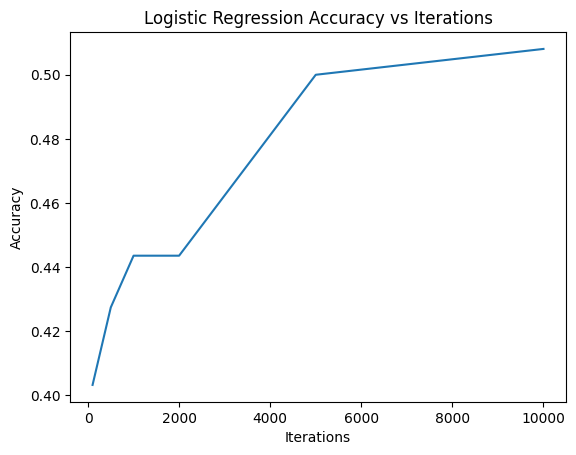

In [ ]:
# now we draw the graph for iterations
lr_accuracies = []
num_iterations = [100, 500, 1000, 2000, 5000, 10000]
for iterations in num_iterations:
    lr_model = LogisticRegression(learning_rate=0.1, num_iterations=iterations)
    lr_model.fit(X_train_encoded, y_train)

    lr_pred = lr_model.predict(X_test_encoded)
    lr_accuracy = np.mean(lr_pred == y_test)
    lr_accuracies.append(lr_accuracy)

plt.plot(num_iterations, lr_accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs Iterations')
plt.show()
